Spatial Temporal Prediction Model for Soil Moisture
---------------------------------------------------

This notebook generates soil moisture prediction maps and their uncertainty for multiple time intervals
model training data is based on daily and weekly averaged data from soil moisture probes and multiple
spatial-temporal dependent covariates. 

The prediction model that is selected here is based on Gaussian Process regression with Bayesian Linear regression as base function.

User settings, such as input/output paths and all other options, are set in the settings file:

`settings_soilmod_moisture_predict.yaml`

This package is part of the machine learning project developed for the Agricultural Research Federation (AgReFed).



In [1]:
# Import libraries
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Import model 
sys.path.append('../python_scripts')
import soilmod_predict_st as soilmod


### Define output directory

In [2]:
# Define name of settings file to save configuration
fname_settings = 'settings_soilmod_moisture_predict.yaml'
path_settings = 'settings'

### Reading and process settings

In [3]:
settings = soilmod.preprocess_settings(os.path.join(path_settings,fname_settings))
print("Main Settings:")
print("----------------")
for key in settings.__dict__:
    if key == "model_function":
        print(f"settings.{key} : {settings.__dict__[key]}")
    if key == "name_target":
        print(f"settings.{key} : {settings.__dict__[key]}")
    if key == "name_features":
        print(f"settings.{key}:")
        for feature in settings.name_features:
            print(f"   '{feature}'")

Main Settings:
----------------
settings.name_target : D1
settings.model_function : blr-gp
settings.name_features:
   'AVERAGE-Soil-Temp-10cm'
   's2_barest_earth_channel1_mean'
   'Landscape_Topographic_wetness_index'
   'TOTAL-Rain-Gauge'
   'Landscape_Slope_median_300m'
   'Landscape_MrVBF'
   'DEM'


### Train model and generate prediction

In [4]:
if settings.integrate_block:
    # Only if blcok integration is set
    print('Generating Block Model and predictions for temporal slices...')
    mu_3d, std_3d = soilmod.model_blocks(settings)
else:
    # default model for point predictions
    print('Generating Point Model and predictions for temporal slices...')
    mu_3d, std_3d = soilmod.model_points(settings)

print("Prediction Mean, Median, Std, 25Perc, 75Perc:", np.round([np.nanmean(mu_3d), np.median(mu_3d[~np.isnan(mu_3d)]), 
    np.nanstd(mu_3d), np.percentile(mu_3d[~np.isnan(mu_3d)],25), np.percentile(mu_3d[~np.isnan(mu_3d)],75)] 
    ,3))
print("Uncertainty Mean, Median, Std, 25Perc, 75Perc:", np.round([np.nanmean(std_3d), np.median(std_3d[~np.isnan(std_3d)]),
    np.nanstd(std_3d), np.percentile(std_3d[~np.isnan(std_3d)],25), np.percentile(std_3d[~np.isnan(std_3d)],75)],3))
print('')
print('Prediction finished')
print(f'All results are saved in output directory {settings.outpath}')

Generating Point Model and predictions for temporal slices...
--- Parameter Settings ---
Model Function: blr-gp
Target Name: D1
Prediction geometry: Point
x,y,z voxsize: (20, 20, 1)
--------------------------
Reading in data...
Optimizing GP hyperparameters...
Mean Input Noise:  1.0041117515284603
Optimized Hyperparameters (amplitude, y_noise_fac, lengthscale_z, lengths_xy): [8.07724880e-01 1.66100351e-04 2.83332403e+01 2.90814112e+02]
Marginal Log Likelihood:  -1992.0285625401384
Computing slices at time: 14
Number of mini-batches per slice:  23


  9%|▊         | 2/23 [00:00<00:05,  3.81it/s]

Logl:  -1992.0285625401384


100%|██████████| 23/23 [00:03<00:00,  7.61it/s]


saving data and generating plots...
Creating plots...
Saving results as geo tif...
Computing slices at time: 27
Number of mini-batches per slice:  23


100%|██████████| 23/23 [00:02<00:00,  8.28it/s]


saving data and generating plots...
Creating plots...
Saving results as geo tif...
Computing slices at time: 40
Number of mini-batches per slice:  23


100%|██████████| 23/23 [00:02<00:00,  8.53it/s]


saving data and generating plots...
Creating plots...
Saving results as geo tif...
Prediction Mean, Median, Std, 25Perc, 75Perc: [0.193 0.194 0.017 0.179 0.206]
Uncertainty Mean, Median, Std, 25Perc, 75Perc: [0.032 0.033 0.002 0.032 0.033]

Prediction finished
All results are saved in output directory Results_Llara_pointmodel_blr-gp_moisture_2020/


## Show all output images

Image files generated:  ['Pred_D1_t014.png', 'Pred_D1_mean.png', 'Pred_D1_t027.png', 'Pred_D1_mean2.png', 'Pred_D1_t040.png']


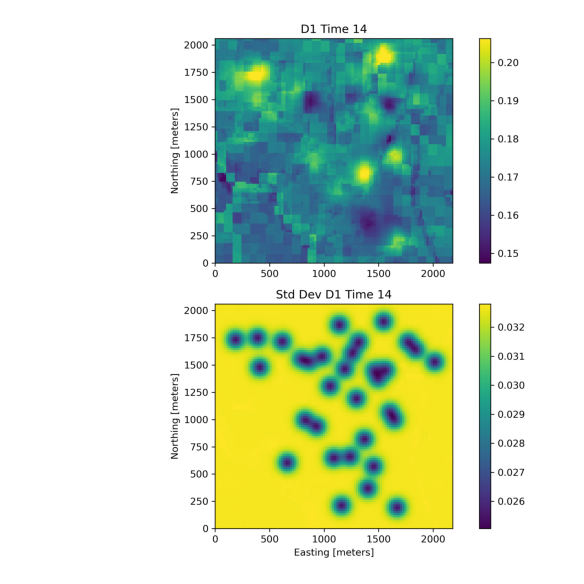

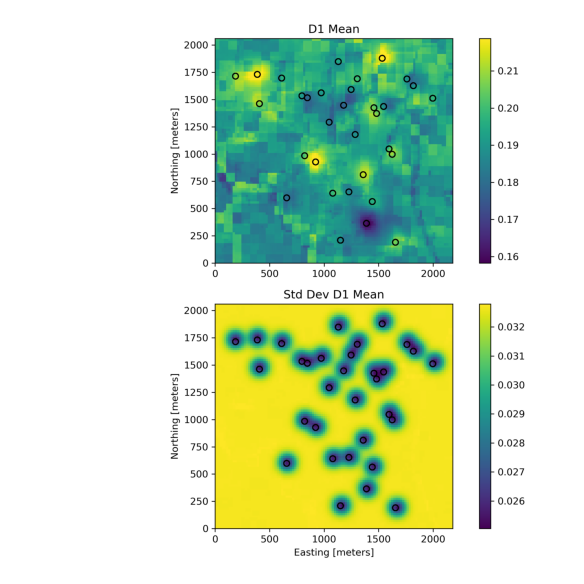

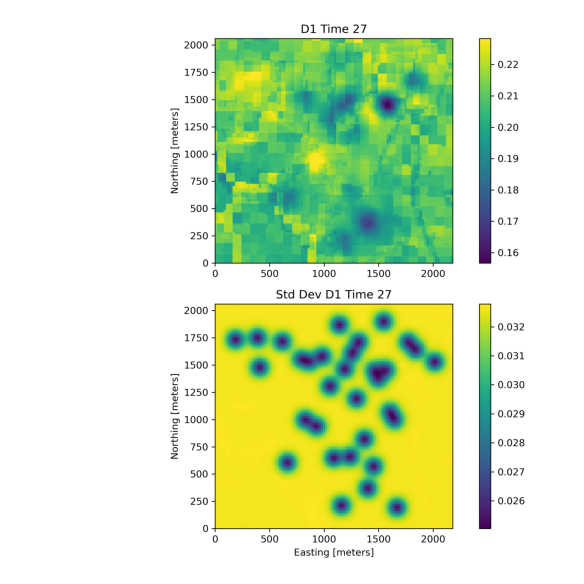

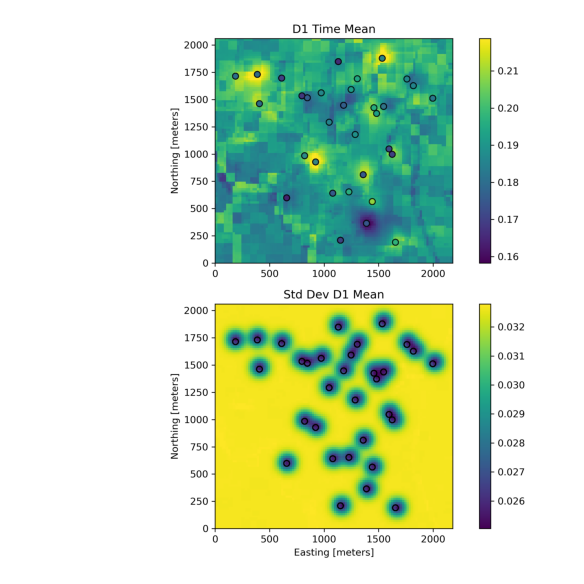

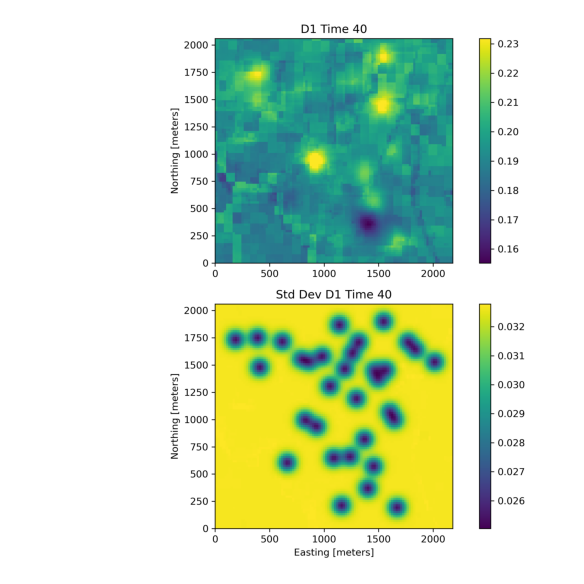

In [5]:
# Get all filenames with  .png format from output directory
imgpath = os.path.join(settings.outpath, 'Predictions')
files = os.listdir(imgpath)
pngfiles = [name for name in files if name.endswith('.png')]
print('Image files generated: ', pngfiles)

# Show images
for i in range(len(pngfiles)):
    fig, ax = plt.subplots(1, dpi =150)
    img = imread(f"{imgpath}/{pngfiles[i]}", format='PNG')
    ax.set_axis_off()
    ax.imshow(img)
    fig.show()